## Basic Graph Analysis with NetworkX

In this notebook we will build a simple graph using the python library NetworkX (https://networkx.org/)
You should install it using:

**! pip install networkx**

or with conda, if you are using that. 

Complete installation instruction: https://networkx.org/documentation/stable/install.html


We will build a basic graph using NetworkX, then do simple computation on that graph. 

This notebook is a good start to understand the basic concepts in the lecture. 
After this, you can jump on the other notebook (made by your teachers and collaborator at DTU), and analyze a graph closer to a real-world one.


Note: this tutorial is partially based on the networkX official tutorial: https://networkx.org/documentation/stable/tutorial.html

Follow the full tutorial if you want to learn more about NetworkX!

In [ ]:
#install networkx if you have not done it already. You should also have numpy, matplotlib and pandas installed
# ! pip install networkx

In [62]:
# ! pip install numpy

In [63]:
# ! pip install matplotlib

In [114]:
# ! pip install pandas

In [13]:
#import the libraries
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Constructing a graph

In [14]:
# create a graph
G = nx.Graph()

In [15]:
#right now, our graph is empty 
G, G.nodes(), G.edges()

(<networkx.classes.graph.Graph at 0x239d60ff488>, NodeView(()), EdgeView([]))

Let's see how to add nodes to the graph

In [16]:
#add a single node
G.add_node(1)
G.add_node(2)

In [17]:
#add multiple nodes from an iterable (e.g. a list)
G.add_nodes_from([3, 4, 5])

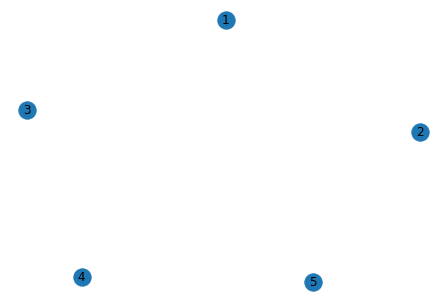

In [18]:
#visualize the graph
pos = nx.spring_layout(G) #to fix the layout
nx.draw(G, with_labels=True, pos=pos)

In [19]:
#let's add edges 
G.add_edge(1, 2)

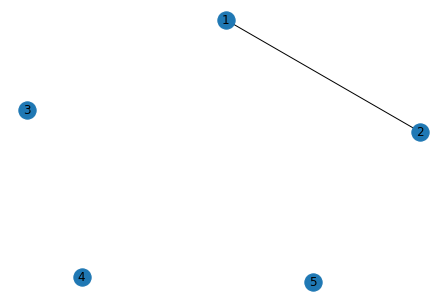

In [20]:
nx.draw(G, with_labels=True, pos=pos)

In [21]:
#or, as before...
G.add_edges_from([(1, 3), (1,5), (3,4), (2,3), (3,4), (4,5)])

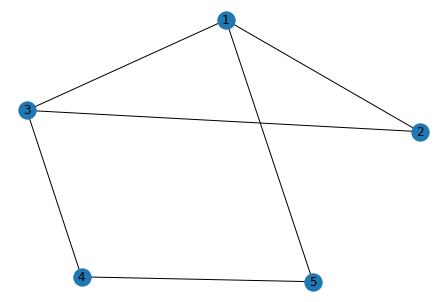

In [22]:
#visualize the graph
nx.draw(G, with_labels=True, pos=pos)

Now try to compute, by hand, the degree of each of the nodes of the above graph.
After that, try to plot it using the below function. See if you can guess it right. 

In [23]:
G.degree(1)

3

In [24]:
G.degree(5)

2

### Adjacency matrix and edge list

Based on what you have learnt in the lecture regarding Adjacency Matrix, try to compute it by hand as well. 
Calculating things by hand is a great way to understand and learn them. Then, use NetworkX to compute them.

After that, if you want, you can try to build new graphs yourself and do the same exercise. This applies also for any graph measure (if the graph is sufficiently small and you can compute those measures by hand).

In [25]:
df = nx.to_pandas_adjacency(G, dtype=int)
df

,1,2,3,4,5
1,0,1,1,0,1
2,1,0,1,0,0
3,1,1,0,1,0
4,0,0,1,0,1
5,1,0,0,1,0


In [26]:
#Remember we could also represent the graph in a more sparse way (less things in memory with the edge list.)
#You can get that in NetworkX by simply doing:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 5), (2, 3), (3, 4), (4, 5)])

### Clustering coefficient

Try again to compute the local clustering coefficient of a node in the graph by hand.
If you have a bit more patience, try also the average local clustering coefficients. 
Below there are the networkX functions to do that.

In [27]:
#let's do it, for example, for node 1 
nx.clustering(G, 1)

0.3333333333333333

In [29]:
#or for node 5 (are its neighbors connected at all?)
nx.clustering(G, 5)

0

In [30]:
#if all the neighbors would be connected, then the clustering coefficient would be one. 
#For instance a complete graph has, for all nodes, clustering coefficient equal to one
complete_graph = nx.complete_graph(5)
nx.clustering(complete_graph)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}

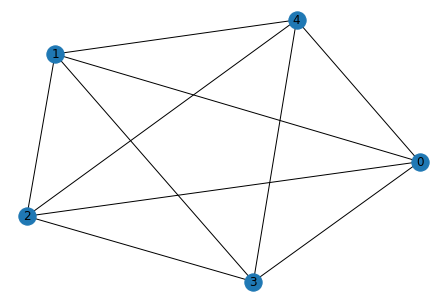

In [31]:
#visualize the graph
pos = nx.spring_layout(complete_graph) #to fix the layout
nx.draw(complete_graph, with_labels=True, pos=pos)

### Jaccard similarity

In networkX, we compute Jaccard similarity (or Jaccard coefficient) between pair of nodes with the Jaccard_coefficient function (ref.: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_prediction.jaccard_coefficient.html?highlight=jaccard#networkx.algorithms.link_prediction.jaccard_coefficient)
This returns an iterator over pair of nodes.

Try to to this by hand between pair of nodes in your original graph G above. After that, run the networkx function and check your results. 

In [32]:
jsim = nx.jaccard_coefficient(G, [(1,2),(3,5)])

In [33]:
for u,v,p in jsim: 
    print(f"({u}, {v}) -> {p:.8f}")

(1, 2) -> 0.25000000
(3, 5) -> 0.66666667


In [35]:
jsim = nx.jaccard_coefficient(G, [(1,5)])

for u,v,p in jsim: 
    print(f"({u}, {v}) -> {p:.8f}")

(1, 5) -> 0.00000000


How woule it be for node 1 and 5 in the following case?

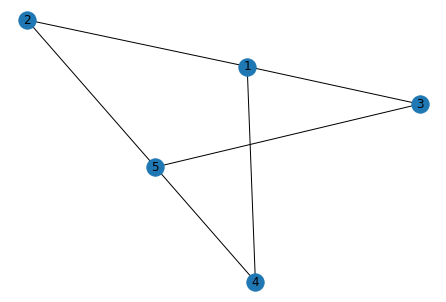

In [37]:
G_t = nx.Graph()
G_t.add_nodes_from([1,2,3,4,5])
G_t.add_edge(1,2)
G_t.add_edge(1,3)
G_t.add_edge(1,4)
G_t.add_edge(5,2)
G_t.add_edge(5,3)
G_t.add_edge(5,4)

#visualize the graph
pos = nx.spring_layout(G_t) #to fix the layout
nx.draw(G_t, with_labels=True)

In [38]:
jsim = nx.jaccard_coefficient(G_t, [(1,5)])
for u,v,p in jsim: 
    print(f"({u}, {v}) -> {p:.8f}")

(1, 5) -> 1.00000000


It is 1.000 because they share all the neighbors. 
Sometimes you can find "Jaccard distance" instead of similarity. It wold simply be 1-Jaccard similarity. So, in this case, it would be zero.

### Generating a Random Graph

Let's generate a random graph with the Erdős-Rényi model. 

(ref: https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html?highlight=erdos%20renyi#networkx.generators.random_graphs.erdos_renyi_graph)

Let's do 100 nodes. Let's experiment with different values of p (probability that two edges are connected).

In [39]:
n = 50 
p = 0.07 #experiment with different values
Ger1 = nx.erdos_renyi_graph(n, p)

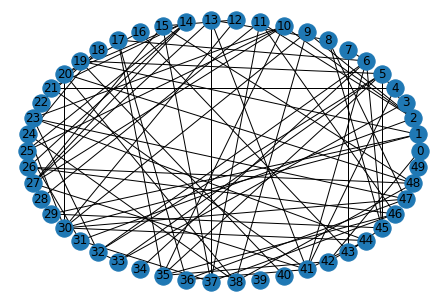

In [40]:
pos = nx.circular_layout(Ger1) #to fix the layout
nx.draw(Ger1, with_labels=True, pos=pos)

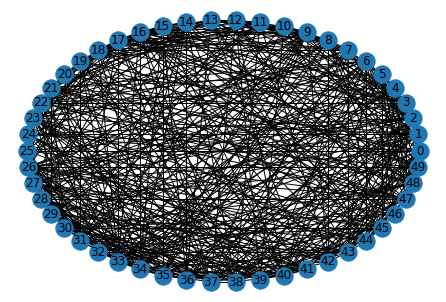

In [41]:
n = 50 
p = 0.4 #experiment with different values
Ger2 = nx.erdos_renyi_graph(n, p)
nx.draw(Ger2, with_labels=True, pos=pos)

They look different. The p is higher. Compute the average local clustering coefficient of those. 
What can you say?

In [90]:
nx.average_clustering(Ger1), nx.average_clustering(Ger2)

(0.06342857142857143, 0.3829646956907826)

As p goes up, higher the probability two nodes are connected. The higher the value of p, the higher the density of the network. 
Also, the higher the value of p, the higher the clustering coefficient. 

You can also visualize, for each node, how many triangles in the graph include that node. Run the commands below, can you see the difference?

In [102]:
nx.triangles(Ger1)

{0: 1,
 1: 0,
 2: 0,
 3: 1,
 4: 0,
 5: 0,
 6: 0,
 7: 2,
 8: 3,
 9: 0,
 10: 1,
 11: 0,
 12: 1,
 13: 0,
 14: 1,
 15: 0,
 16: 2,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 1,
 23: 1,
 24: 0,
 25: 0,
 26: 1,
 27: 1,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 0,
 41: 0,
 42: 0,
 43: 1,
 44: 1,
 45: 1,
 46: 2,
 47: 0,
 48: 1,
 49: 0}

In [103]:
nx.triangles(Ger2)

{0: 65,
 1: 103,
 2: 39,
 3: 43,
 4: 64,
 5: 70,
 6: 78,
 7: 51,
 8: 37,
 9: 110,
 10: 68,
 11: 63,
 12: 133,
 13: 112,
 14: 79,
 15: 97,
 16: 25,
 17: 45,
 18: 36,
 19: 37,
 20: 78,
 21: 77,
 22: 62,
 23: 109,
 24: 53,
 25: 104,
 26: 52,
 27: 63,
 28: 46,
 29: 63,
 30: 70,
 31: 117,
 32: 63,
 33: 84,
 34: 55,
 35: 52,
 36: 73,
 37: 35,
 38: 115,
 39: 74,
 40: 57,
 41: 105,
 42: 52,
 43: 82,
 44: 66,
 45: 103,
 46: 60,
 47: 69,
 48: 11,
 49: 36}

Note: there are many more random graphs with different characteristics you can generate. Check them in networkx!

### Degree distribution

If you try to generate a bigger E.R. random graph and you plot the degree distribution (for instance as a degree instogram), you will see it looks like a binomial distribution. 
When you analyse a real-world network (for example in the other notebook) you will see the difference. 

In [170]:
n = 1000
p = 0.4 #experiment with different values
Ger3 = nx.erdos_renyi_graph(n, p)

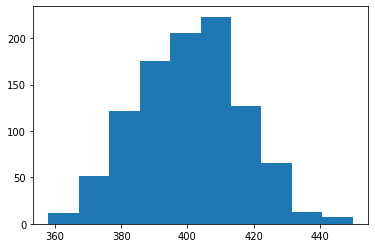

In [172]:
def plot_degree_dist(g):
    degrees = [g.degree(n) for n in g.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(Ger3)

#### Note

A good repository to find and play with real networks is Icon: https://icon.colorado.edu/#!/